In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy import stats
import scipy

In [2]:
# sample meta-data
sample_info = pd.read_csv('C:/Users/lorte/Documents/data/1D/IPTS_27405_Sample_Info.csv')
path = os.getcwd()
figurepath = path + '/figures'

# helpful meta-data dictionaries
names = dict(zip(sample_info['Sample'], sample_info['Name']))
matrix = dict(zip(sample_info['Sample'], sample_info['Matrix Polymer']))
solvent_names = dict(zip(sample_info['Sample'], sample_info['Solvent']))

# target concentrations of polymer
target_CP = dict(zip(sample_info['Sample'], sample_info['Target CP Concentration']))
target_matrix = dict(zip(sample_info['Sample'], sample_info['Target Matrix Concentration']))

In [3]:
print(len(names.keys()))

34


In [83]:
#read in the data
data_dir = 'C:/Users/lorte/Documents/data/1D/'
files = os.listdir(data_dir)
sans_data = {}
for file in files:
    if 'merged' in file:
        key = int(file.split('_')[0][1:])
        sans_data[key] = pd.read_csv(data_dir + file, header = 2, delimiter = "\t", names = ['Q', 'I', 'DI', 'DQ'], nrows = 115)

        
#cutting the data 
for sample in sans_data.keys():
    sans_data[sample] = sans_data[sample][sans_data[sample].I > 0]
    sans_data[sample] = sans_data[sample][sans_data[sample].Q > 0.003]
    
#subtracting the background
for sample in sans_data.keys():
    background = sans_data[sample]['I'][40:].min()
    #background_loc = sans_data[sample][sans_data[sample]['I'] == sans_data[sample]['I'][40:].min()].index.values
    #sans_data[sample]['I'] = sans_data[sample]['I']-0.
    print(sample, background)
    #sans_data[sample][:65]
    sans_data[sample] = sans_data[sample].reset_index()

100 0.04586039
101 0.5037175
102 0.04540323
103 1.074818
104 0.1106374
105 0.02927009
106 0.4495614
107 0.09731434
110 0.1111809
111 0.1170706
112 0.1080372
113 0.09819397
114 0.1036388
115 0.1155068
116 0.2593694
117 0.2129404
118 0.2176305
119 0.06110624
120 0.08101315
121 0.09499846
130 0.06280155
131 1.444708
132 0.3040744
133 0.0385745
134 0.5428232
135 0.05189049
200 0.04690109
201 0.04581025
202 0.05189125
203 0.04976941
300 0.06851232
301 0.0587682
302 0.0650712
303 0.06717559


    index         Q         I        DI        DQ
0      22  0.003054  3.744143  0.135118  0.000380
1      23  0.003275  2.658936  0.116588  0.000385
2      24  0.003511  2.860778  0.103636  0.000391
3      25  0.003765  1.096759  0.088046  0.000398
4      26  0.004037  0.535057  0.076508  0.000406
..    ...       ...       ...       ...       ...
88    110  0.613591  0.021111  0.000274  0.033612
89    111  0.657933  0.022180  0.000310  0.035842
90    112  0.705480  0.024524  0.000382  0.038322
91    113  0.756463  0.027871  0.000530  0.040864
92    114  0.811131  0.026845  0.001614  0.042957

[93 rows x 5 columns]


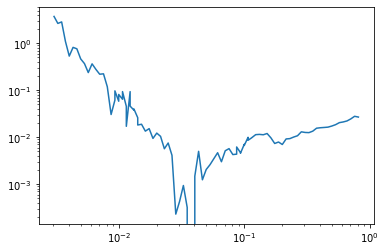

In [80]:
sample = 101
plt.plot(sans_data[sample].Q, sans_data[sample].I)
plt.xscale('log')
plt.yscale('log')
print(sans_data[sample])

LinregressResult(slope=-0.8594490610038925, intercept=-4.914571732882618, rvalue=-0.8238058427767874, pvalue=8.042580522297487e-06, stderr=0.1393939977852113)
LinregressResult(slope=-0.4758760446467135, intercept=-1.6576364007194888, rvalue=-0.7936914488367204, pvalue=2.9580192546261715e-05, stderr=0.08596830673613873)
LinregressResult(slope=-1.2486929883574724, intercept=-6.724189630260227, rvalue=-0.8947211499100776, pvalue=1.023994176856333e-07, stderr=0.1469179753611596)


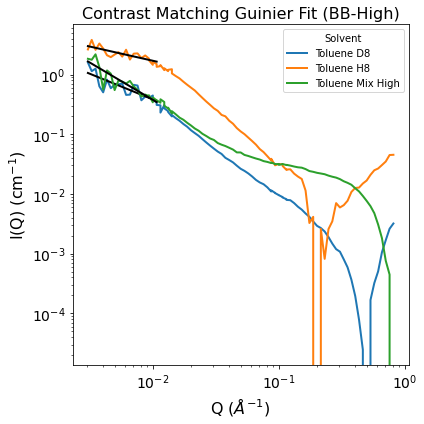

In [66]:
#deuteration fitting
plt.figure(figsize = (6,6))
samples = [102,103,104]
depth = 20
title = "Contrast Matching Guinier Fit (BB-High)"
legend_title = 'Solvent'
for sample in samples:
        xval = sans_data[sample]["Q"]
        yval = sans_data[sample]["I"]
        result = stats.linregress(np.log(xval[:depth]),np.log(yval[:depth]))
        print(result)
        xval1 = np.linspace(xval[0],xval[depth],100)
        #yval1 = xval1*result.slope + result.intercept
        yval1 = np.exp(np.log(xval1)*result.slope + result.intercept)
        plt.plot(xval,yval, label = solvent_names[sample],lw =2)
        plt.plot(xval1,yval1, color = 'k', lw = 2)
        
plt.xscale('log')
plt.yscale('log')

plt.xlabel(r'Q ($\AA^{-1}$)', fontsize=16)
plt.ylabel(r'I(Q) (cm$^{-1}$)', fontsize=16)

legend = plt.legend(fontsize=10, title=legend_title)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#plt.ylim(1e-03, 1e11)
#plt.xlim(0.00002, 0.3)
    
plt.title(title, fontsize=16)
    
plt.tight_layout()

plt.savefig(figurepath + "/"  + title, dpi=600)

In [178]:
def log_func(x,m,b):
    return np.exp(np.log(x)*m+b)

samples = [102,103,104,105]
depth = 20
for sample in samples:
        xval = sans_data[sample]["Q"]
        yval = sans_data[sample]["I"]
        result = stats.linregress(np.log(xval[:depth]),np.log(yval[:depth]))
        xval1 = np.linspace(xval[0],1,100)
        yval1 = np.exp(np.log(xval1)*result.slope + result.intercept)
        approx = scipy.integrate.quad(log_func,xval[0],1,args = (result.slope,result.intercept))
        print(str(sample) + str(approx))

102(0.07538314368670972, 4.0818241347771495e-09)
103(0.06291287192096702, 9.9896056227689e-11)
104(0.028668034281510678, 6.493072460275719e-11)
105(0.017772423474909572, 1.2456160250864888e-11)


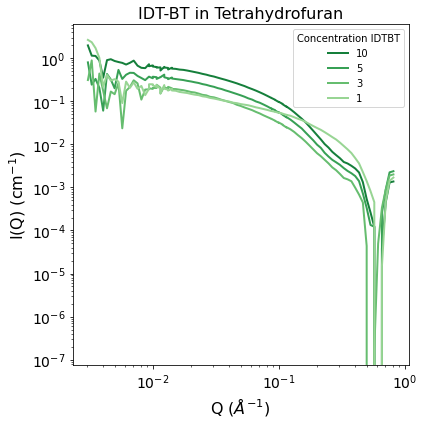

In [48]:
#gradient plotting

plt.figure(figsize = (6,6))
title = "IDT-BT in Tetrahydrofuran"
legend_title = 'Concentration IDTBT'
samples = [303,302,301,300]
color_idx = np.linspace(0.2, 0.6, len(samples))
for i,sample in zip(color_idx,samples):
        xval = sans_data[sample]["Q"]
        yval = sans_data[sample]["I"]
        plt.plot(xval,yval, label = target_CP[sample], color=plt.cm.Greens_r(i), lw =2)
        
plt.xscale('log')
plt.yscale('log')

plt.xlabel(r'Q ($\AA^{-1}$)', fontsize=16)
plt.ylabel(r'I(Q) (cm$^{-1}$)', fontsize=16)

legend = plt.legend(fontsize=10, title=legend_title)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#plt.ylim(1e-03, 1e11)
#plt.xlim(0.00002, 0.3)

plt.title(title, fontsize=16)
    
plt.tight_layout()

plt.savefig(figurepath + "/"  + title, dpi=600)